In [1]:
import pandas as pd
import numpy as np
import tqdm
import os

import logging
logging.basicConfig(format='%(asctime)s [%(levelname)s] %(message)s',
                    level=logging.INFO)

import nltk
from nltk import FreqDist

from fuzzywuzzy import fuzz
from bs4 import BeautifulSoup
import lxml
import re

from nltk.corpus import stopwords

In [2]:
root_dir = r"C:\Users\wb570559\github\india_air_pollution\data\processed_data\\"

In [3]:
df_cases = pd.read_csv(root_dir+"case_data_final.csv")

In [4]:
text_dir = r"C:\Users\wb570559\github\india_air_pollution\data\raw_data\Air Pollution text\Air Pollution text\\"

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words = set(stopwords.words('english'))
c_vec = CountVectorizer(stop_words=stop_words, ngram_range=(2,3))


# Function to remove punctuation
def Punctuation(string):

    # punctuation marks
    punctuations = '''!()-[]{};:'"\,<.>/?@#$%^&*_~0123456789'''

    # traverse the given string and if any punctuation
    # marks occur replace it with null
    string = string.replace("\n", "")
    for x in string.lower():
        if x in punctuations:
            string = string.replace(x, " ")



    string = string.strip()
     

    return string

In [6]:
full_corpus = []
for index in tqdm.trange(len(df_cases)):
    kanoon_id = int(df_cases["Kanoon_ID"][index])

    path = text_dir + "/" + str(kanoon_id) + ".html"      

    f = open(path, "r", encoding="utf-8").read()
    soup = BeautifulSoup(f, 'lxml')
    text = soup.findAll("div", {"class": "judgments"})
    text = str(text[0].text).lower().replace("\n", "")
    #full_corpus = full_corpus+text
    
    full_corpus.append(text)


100%|██████████| 1910/1910 [00:29<00:00, 65.72it/s]


In [7]:
df_cases["text"] = full_corpus

In [8]:
df_cases.head()

,participant_label,Kanoon_ID,Case id,Judge 1,Judge 2,Judge 3,Petitioners,Respondents,Is Appeal,Is Constitutional,...,pa_constitution,pa_criminal,pa_labour,pa_company,pa_tax,pa_administrative,pa_commercial,pa_arbitration,pa_family,text
0,valasa maharshi,1320.0,(2006) 104 TTJ Delhi 213,d singh,R c Sharma,NaN,Deputy Commissioner Of Income Tax,Saraya Industries Ltd.,no,no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,try out our premium member services: virtual l...
1,aditya pandav,1569.0,WP(C).No. 21565 of 2009(M),V.GIRI,NaN,NaN,THANKAMMA PAULOSE,"THE SECRETARY,KADAPRA GRAMA PANCHAYAT,",no,no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,try out our premium member services: virtual l...
2,surya sriram,7577.0,NaN,N Hanumanthappa,A Bhate,NaN,"K. Srinivasan, Residents of Krishnapuri Colony...","Executive Officer, Cantonment, Kartik Construc...",no,no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,andhra high courtk. srinivasan and others vs e...
3,astha123,11626.0,1989 AIR 611,Mukharjii,Sabyasachi,KANIA,"MEMBER-SECRETARY, ANDHRA PRADESH STATEBOARD FO...",Andhra Pradesh Rayons Ltd. & Ors,no,no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"supreme court of indiamember-secretary, andhra..."
4,astha123,14406.0,2004 (3) KLT 577,K B Nair,NaN,NaN,Soman,Geologist,no,yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,kerala high courtsoman vs geologist on 24 augu...


In [11]:
ngrams = c_vec.fit_transform(df_cases['text'])

In [12]:
#ngrams

In [13]:
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_

In [14]:
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'ngram'})

In [15]:
df_ngram = df_ngram[:1000]

In [16]:
df_ngram["n_val"] = df_ngram["ngram"].apply(lambda x: len(x.split()))

In [17]:
#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

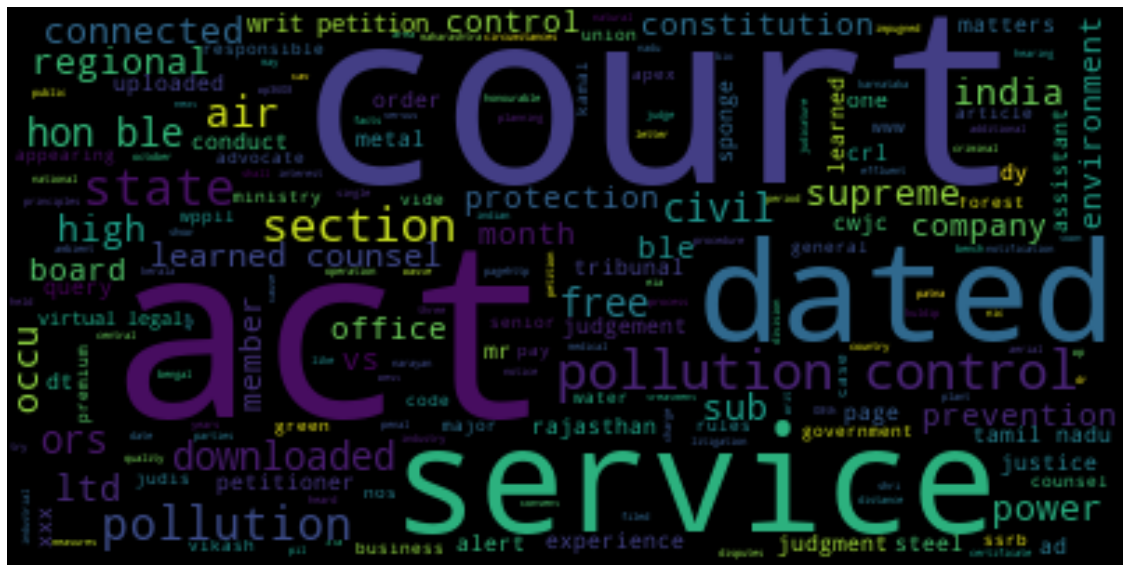

In [25]:
text = df_ngram[df_ngram.n_val== 3].ngram.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = stop_words,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

plt.show()

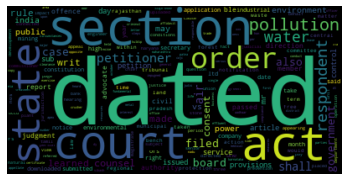

In [20]:
text = df_ngram[df_ngram.n_val== 2].ngram.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = stop_words,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [23]:
df_ngram.to_csv(root_dir + "n_grams.csv")

In [26]:
df_ngram[:50]

,frequency,ngram,n_val
0,11265,pollution control,2
1,8666,control board,2
2,8267,high court,2
3,8139,pollution control board,3
4,8121,writ petition,2
5,7171,learned counsel,2
6,6534,supreme court,2
7,6202,hon ble,2
8,5441,order dated,2
9,5395,state government,2
